## EECS 453/551
# Photometric Stereo

By imaging an object illuminated from several angles, we can construct a 3D representation. Regularized least squares provides a solution to this problem.
___

# Description of existing Matlab code

Here's my view of the Matlab code:
* `demo.m` compares three methods for deriving a surface from gradient information.
    1. Frankot Chellappa: use Fourier transform. Code is straightforward, no reason I couldn't implement this in Python.
    2. `grad2surf` toolbox: solve the least squares problem, but view the normal equation as a Sylvester equation, and solve using the Bartels-Stewart algorithm. Code is scattered across several files. I could translate it to Python given enough time, but it appears this is only included in the demo to provide another comparison for our least squares result.
    3. Use `surface2normal`: this is the code students will write in HW. Python translation appears to be easy.
* It seems the first two methods are included only for reference. Translating them to Python provides little value. Python's opencv package provides a one-liner for obtaining a reference surface, so I'd sooner just use that.
* So my goal is to translate `surface2normal` into Python and make a notebook to demonstrate it.
    1. Translate `surface2normal`. Write tests. Use Python autograder code as style guide.
    2. Make demo notebook that constructs and visualizes a surface using Python. Explain various difference operators and their connections to Fourier series. Show differences in output.
    3. Write `hw8p8_sol.py` and `hw8p9_sol.py`. Step 1 effectively does this already. **Andrew is doing this.**

# Step 1: translating `surface2normal` to Python
## Loading data
Always helpful to be able to check intermediate results. I'll begin by [loading][1] Buddha.mat into Python.

[1]: http://docs.scipy.org/doc/scipy/reference/tutorial/io.html

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as sio
from photometric import *

%matplotlib notebook

In [3]:
d = sio.loadmat('cat.mat')
L, I, M = d['L'], d['I'], d['M']
mask = M.astype(bool)

## cat demo

In [4]:
nIters = 1000
regparam = 0

m, n = I.shape[:2]

N = hw8pw(I, L)

DFDX = -N[:,:,0]/N[:,:,2]
DFDY = N[:,:,1]/N[:,:,2]
DFDX[np.isnan(DFDX) | ~mask.astype(bool)] = 0
DFDY[np.isnan(DFDY) | ~mask.astype(bool)] = 0

A, b = hw8p9a(DFDX, DFDY, regparam)
fxy = lsqr(A, b, atol=1e-6, btol=1e-6, iter_lim=nIters)

# format surface
FXY = fxy[0].reshape((m,n), order='F')
FXY -= FXY[mask.astype(bool)].min()
XX, YY = np.meshgrid(np.arange(0,n,1), np.arange(m,0,-1))

/home/jkersulis/Documents/Dropbox/551f15/notebooks/photometric-stereo/python/photometric.py:61: RuntimeWarning: invalid value encountered in true_divide
  N = g/(np.linalg.norm(g, axis=2)[:,:,np.newaxis])


<IPython.core.display.Javascript object>


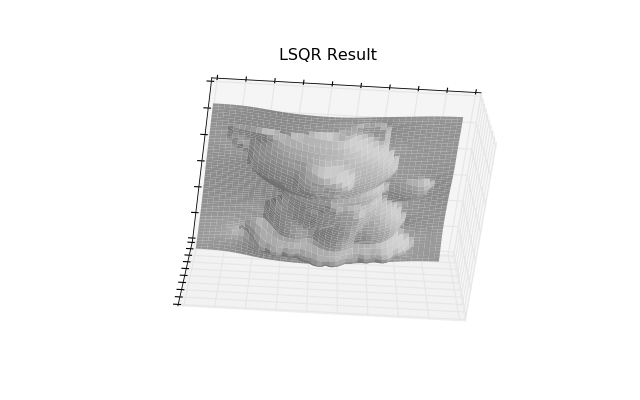

In [14]:
# plot
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_surface(XX, YY, FXY, color='lightgray', linewidth=0)
ax1.view_init(120, 270)
ax1.set_xticklabels('')
ax1.set_yticklabels('')
ax1.set_zticklabels('')
ax1.set_title('LSQR Result')

# ax2 = fig.add_subplot(132, projection='3d')
# ax2.plot_surface(XX, YY, FXY, color='lightgray', linewidth=0)
# ax2.view_init(135, 135)